In [1]:
# import modules

import pandas as pd
import numpy as np
import json
from pandas.io.json import json_normalize
from geopy.distance import vincenty
import re
import statsmodels.formula.api as sm
%pylab inline

# load yelp API

from yelp.client import Client
from yelp.oauth1_authenticator import Oauth1Authenticator

# read API keys
with open('config_secret.json') as cred:
    creds = json.load(cred)
    auth = Oauth1Authenticator(**creds)
    client = Client(auth)

Populating the interactive namespace from numpy and matplotlib


In [20]:
# read combined yelp and crime data csv

yelpcrimedf = pd.read_csv('yelpcrimedf.csv', index_col=0)

In [21]:
# abbreviate crime names

felonyfull=list(yelpcrimedf.columns[-7:])
felonyabbrv=['BUR','ASS','LAR','GTA','MUR','RAP','ROB']
felony_ref=pd.DataFrame({'code':felonyabbrv, 'full_name':felonyfull})
print(felony_ref)

  code                       full_name
0  BUR                        BURGLARY
1  ASS                  FELONY ASSAULT
2  LAR                   GRAND LARCENY
3  GTA  GRAND LARCENY OF MOTOR VEHICLE
4  MUR  MURDER & NON-NEGL. MANSLAUGHTE
5  RAP                            RAPE
6  ROB                         ROBBERY


In [22]:
# rename crime columns with 3 letter code

yelpcrimedf.rename(columns=dict(zip(felony_ref.full_name, felony_ref.code)), inplace=True)

In [23]:
# sum of felonies by business

yelpcrimedf['TOT']=yelpcrimedf[felonyabbrv].sum(axis=1)

In [6]:
# create category aliases using Category data

category_alias_unpacker = lambda x: re.findall("alias='(\w+)'", x)

yelpcrimedf['cat_alias']=yelpcrimedf['categories'].apply(category_alias_unpacker)

In [821]:
from ast import literal_eval
literal_eval(yelpcrimedf.neighborhoods[1])

['Midtown West', "Hell's Kitchen"]

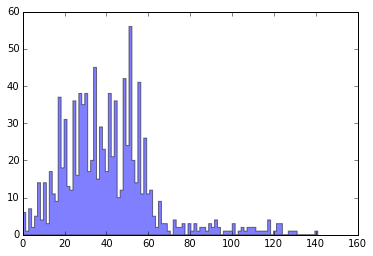

In [8]:
# histogram of crime scores

fig, ax = plt.subplots()

H = ax.hist(yelpcrimedf['BUR'], bins=100, alpha=0.5, histtype='stepfilled')

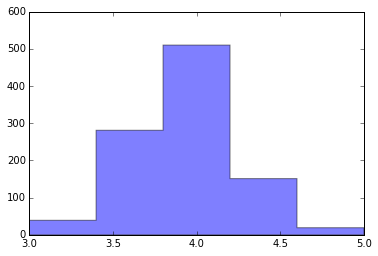

In [766]:
# histogram of ratings

fig, ax = plt.subplots()

H = ax.hist(yelpcrimedf['rating'], bins=5, alpha=0.5, histtype='stepfilled')

/Users/Heikal/anaconda/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


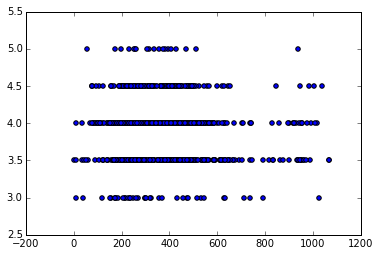

In [12]:
# scatterplot of crime score vs ratings

fig, ax = plt.subplots()
im = ax.scatter(yelpcrimedf['crime_score'], crimeindexdf['rating'],  cmap=plt.cm.jet)

In [15]:
#need a way to easily slice across categories

#build list of unique category aliases

unique_cat_alias=[]
for x in crimeindexdf.cat_alias:
    for y in x:
        unique_cat_alias.append(y)
unique_cat_alias=list(set(unique_cat_alias))

    

In [51]:
#create function to take in category name as input and creates crime index df for that category as output